<a href="https://colab.research.google.com/github/ROARMarketingConcepts/Machine-Learning-Projects/blob/master/Mall_Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mall Customer Segmentation Analysis

### Background

We own a supermarket mall and through membership cards , we have some basic data about our customers like Customer ID, age, gender, annual income and spending score. Spending Score is something we assign to each customer based on our defined parameters like customer behavior and purchasing data.

### Problem Statement 

We want to understand which customers can easily be converted (Target Customers) so that we can relay this information to the marketing team and plan the strategy accordingly.

### Inspiration

By the end of this analysis, we will be able to answer the following questions. 

1- How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python. 

2- Who are our target customers to whom we can start marketing? 


### Analysis performed by:

Ken Wood

Senior Marketing Strategist

ken@roarmarketingconcepts.com




---



### Mount the Google Drive where the dataset is located...

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
# !apt install proj-bin libproj-dev libgeos-dev
# !pip install git+https://github.com/thearn/pygmaps-extended
# !pip install gmplot

In [0]:
# !pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
# !sudo pip install -U git+https://github.com/matplotlib/basemap.git

### Install some necessary packages to perform the required analysis...

In [0]:
# !pip install -U scikit-learn
# !pip install --user --upgrade tables
# !sudo -H pip install seaborn==0.9.0

# !pip install pyproj

import pandas as pd
import numpy as np
import sklearn
import scipy
import calendar
from datetime import datetime as dt

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import interactive
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import PercentFormatter
plt.rc("font", size=14)
from pylab import scatter, show, legend, xlabel, ylabel

# from mpl_toolkits.basemap import Basemap

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [5]:
"""width = 28000000; lon_0 = -105; lat_0 = 40
m = Basemap(width=width,height=width,projection='aeqd',
            lat_0=lat_0,lon_0=lon_0)
# fill background.
m.drawmapboundary(fill_color='aqua')
# draw coasts and fill continents.
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='coral',lake_color='aqua')
# 20 degree graticule.
m.drawparallels(np.arange(-80,81,20))
m.drawmeridians(np.arange(-180,180,20))
# draw a black dot at the center.
xpt, ypt = m(lon_0, lat_0)
m.plot([xpt],[ypt],'ko')
# draw the title.
plt.title('Azimuthal Equidistant Projection')
plt.show()"""

"width = 28000000; lon_0 = -105; lat_0 = 40\nm = Basemap(width=width,height=width,projection='aeqd',\n            lat_0=lat_0,lon_0=lon_0)\n# fill background.\nm.drawmapboundary(fill_color='aqua')\n# draw coasts and fill continents.\nm.drawcoastlines(linewidth=0.5)\nm.fillcontinents(color='coral',lake_color='aqua')\n# 20 degree graticule.\nm.drawparallels(np.arange(-80,81,20))\nm.drawmeridians(np.arange(-180,180,20))\n# draw a black dot at the center.\nxpt, ypt = m(lon_0, lat_0)\nm.plot([xpt],[ypt],'ko')\n# draw the title.\nplt.title('Azimuthal Equidistant Projection')\nplt.show()"

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Load the dataset...

In [0]:
df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Mall Customer Analysis/Mall_Customers.csv')

### Let's take a quick look at a few lines of the dataset...

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### How many values in the dataset are missing?

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Let's use 'CustomerID' as the index for the dataset.

In [0]:
df.set_index('CustomerID',inplace=True)

### Let's color code the 'Gender' feature for plotting...

In [0]:
df['Gender Color'] = df.Gender.map({'Female':'#3498db', 'Male':'#9b59b6'})

In [12]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender Color
CustomerID,,,,,
1,Male,19,15,39,#9b59b6
2,Male,21,15,81,#9b59b6
3,Female,20,16,6,#3498db
4,Female,23,16,77,#3498db
5,Female,31,17,40,#3498db


In [13]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [0]:
df['Age Groups'] = pd.cut(df.Age,bins=[10, 20, 30, 40, 50, 60, 70],include_lowest=False)
df_plot1 = df.groupby(['Age Groups','Gender']).count().reset_index()
df_plot1.rename(columns={'Age':'Number'},inplace=True)

### Let's plot the number of males and females by age group.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0, 0.5, 'Count')

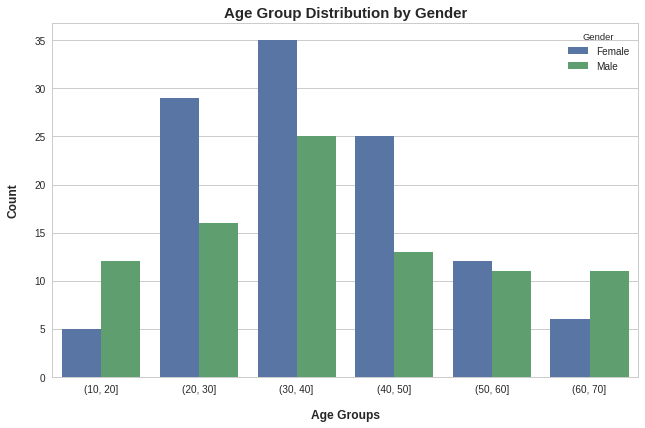

In [15]:
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
ax = sns.barplot(x="Age Groups", y='Number', hue="Gender", data=df_plot1)
plt.title('Age Group Distribution by Gender',fontsize=15,fontweight='bold')
plt.xlabel('Age Groups',labelpad = 15,fontsize=12,fontweight='bold')
plt.ylabel('Count',labelpad = 15,fontsize=12,fontweight='bold')

### Let's plot the number of males and females by Annual Income.

In [0]:
df['Income Groups'] = pd.cut(df['Annual Income (k$)'],bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140],include_lowest=False)
df_plot2 = df.groupby(['Income Groups','Gender']).count().reset_index()
df_plot2.rename(columns={'Age':'Number'},inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0, 0.5, 'Count')

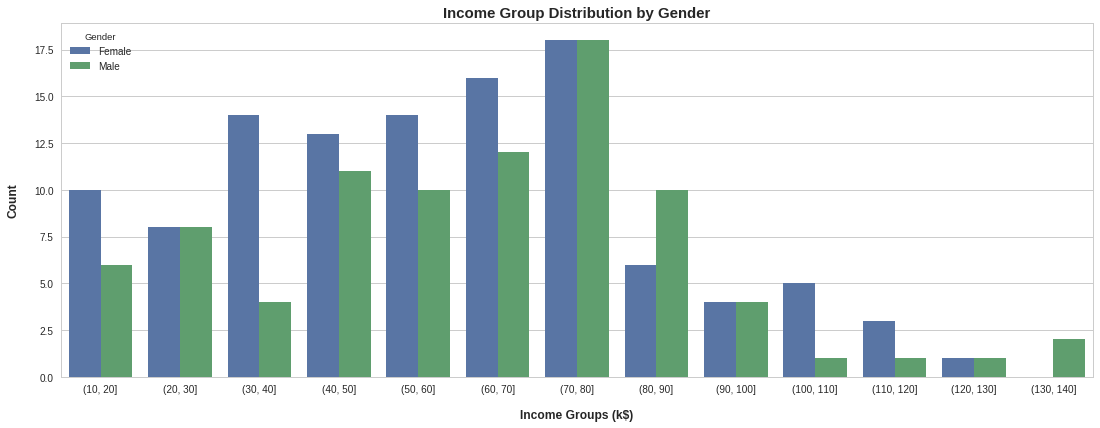

In [17]:
fig = plt.gcf()
fig.set_size_inches(18.5, 6.5)
ax = sns.barplot(x="Income Groups", y='Number', hue="Gender", data=df_plot2)
plt.title('Income Group Distribution by Gender',fontsize=15,fontweight='bold')
plt.xlabel('Income Groups (k$)',labelpad = 15,fontsize=12,fontweight='bold')
plt.ylabel('Count',labelpad = 15,fontsize=12,fontweight='bold')

### Let's plot the number of males and females by Spending Score.

In [0]:
df['Spending Score Groups'] = pd.cut(df['Spending Score (1-100)'],bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],include_lowest=False)
df_plot3 = df.groupby(['Spending Score Groups','Gender']).count().reset_index()
df_plot3.rename(columns={'Age':'Number'},inplace=True)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0, 0.5, 'Count')

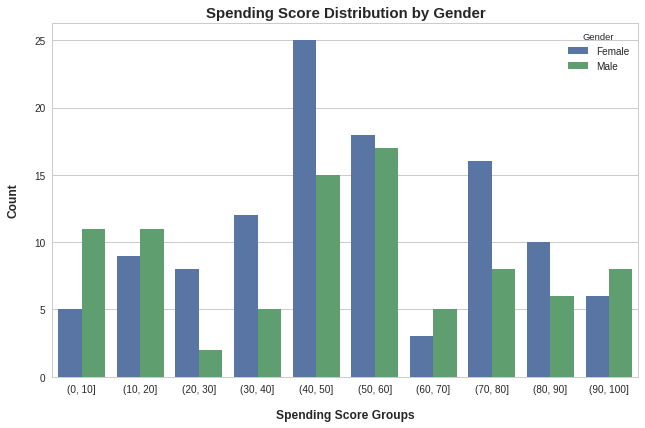

In [19]:
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
ax = sns.barplot(x="Spending Score Groups", y='Number', hue="Gender", data=df_plot3)
plt.title('Spending Score Distribution by Gender',fontsize=15,fontweight='bold')
plt.xlabel('Spending Score Groups',labelpad = 15,fontsize=12,fontweight='bold')
plt.ylabel('Count',labelpad = 15,fontsize=12,fontweight='bold')

### Let's see how the Spending Score is distributed over age.

In [0]:
df_plot4 = df.groupby(['Spending Score Groups','Age Groups']).count().reset_index()
df_plot4.Age.fillna(0)
df_plot4.rename(columns={'Age':'Number'},inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0, 0.5, 'Count')

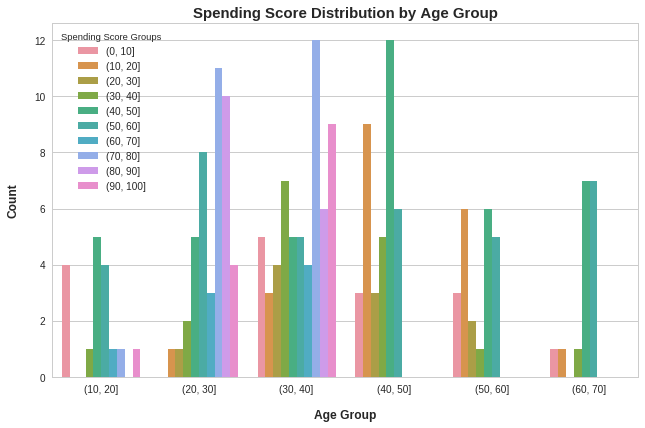

In [21]:
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
ax = sns.barplot(x="Age Groups", y='Number', hue='Spending Score Groups', data=df_plot4)
plt.title('Spending Score Distribution by Age Group',fontsize=15,fontweight='bold')
plt.xlabel('Age Group',labelpad = 15,fontsize=12,fontweight='bold')
plt.ylabel('Count',labelpad = 15,fontsize=12,fontweight='bold')

In [22]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender Color,Age Groups,Income Groups,Spending Score Groups
CustomerID,,,,,,,,
1,Male,19,15,39,#9b59b6,"(10, 20]","(10, 20]","(30, 40]"
2,Male,21,15,81,#9b59b6,"(20, 30]","(10, 20]","(80, 90]"
3,Female,20,16,6,#3498db,"(10, 20]","(10, 20]","(0, 10]"
4,Female,23,16,77,#3498db,"(20, 30]","(10, 20]","(70, 80]"
5,Female,31,17,40,#3498db,"(30, 40]","(10, 20]","(30, 40]"


### Let's produce a scatter plot of annual income vs. spending score...

Text(39.3269079166667, 0.5, 'Spending Score')

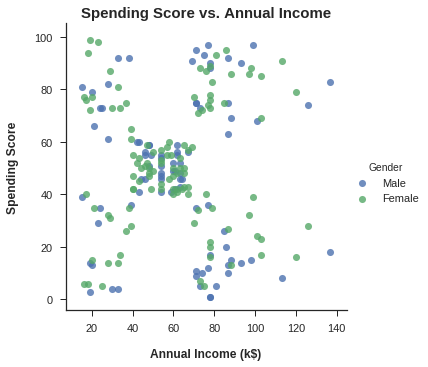

In [23]:
# Set style of scatterplot

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('Annual Income (k$)', # Horizontal axis
           'Spending Score (1-100)', # Vertical axis
           data=df, # Data source
           hue='Gender', # Different color markers for 'Male' & 'Female'
           fit_reg=False, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "s": 50, }) # S marker size

#sns.plt.show()

plt.title('Spending Score vs. Annual Income',fontsize=15,fontweight='bold')
plt.xlabel('Annual Income (k$)',labelpad = 15,fontsize=12,fontweight='bold')
plt.ylabel('Spending Score',labelpad = 15,fontsize=12,fontweight='bold')

### Let's use sklearn's Kmeans Clustering function to determine centroids for these unsupervised data.  

In [0]:
df_kmeans_income = df[['Annual Income (k$)','Spending Score (1-100)']].copy()
df_kmeans_age = df[['Age','Spending Score (1-100)']].copy()
df_kmeans_age_income = df[['Age','Annual Income (k$)','Spending Score (1-100)']].copy()

In [0]:
from sklearn.cluster import KMeans

kmeans_income = KMeans(n_clusters=5)
kmeans_income.fit(df_kmeans_income)
y_kmeans_income = kmeans_income.predict(df_kmeans_income)

Location of centroids: 
 [[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]] 




Text(0, 0.5, 'Spending Score')

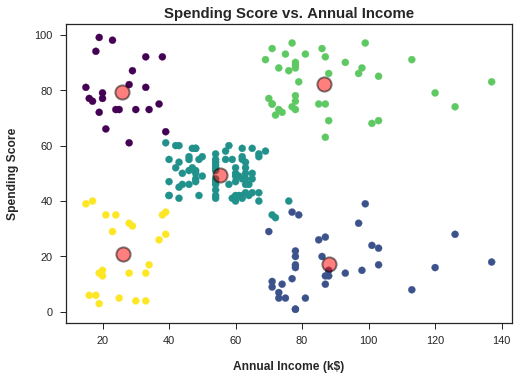

In [26]:
plt.scatter(df_kmeans_income['Annual Income (k$)'], df_kmeans_income['Spending Score (1-100)'], s=50, c=y_kmeans_income, cmap='viridis')

centers_income = kmeans_income.cluster_centers_
print('Location of centroids: \n',centers_income,'\n\n')

plt.scatter(centers_income[:, 0], centers_income[:, 1], c='red', s=200, edgecolor = 'black', linewidth =2,alpha=0.5);

plt.title('Spending Score vs. Annual Income',fontsize=15,fontweight='bold')
plt.xlabel('Annual Income (k$)',labelpad = 15,fontsize=12,fontweight='bold')
plt.ylabel('Spending Score',labelpad = 15,fontsize=12,fontweight='bold')

### Let's produce a scatter plot of age vs. spending score...

Text(39.3269079166667, 0.5, 'Spending Score')

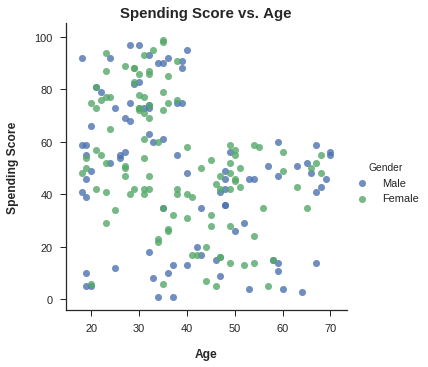

In [27]:
# Set style of scatterplot

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('Age', # Horizontal axis
           'Spending Score (1-100)', # Vertical axis
           data=df, # Data source
           hue = 'Gender', # Different color markers for 'Male' & 'Female'
           fit_reg=False, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "s": 50}) # S marker size

plt.title('Spending Score vs. Age',fontsize=15,fontweight='bold')
plt.xlabel('Age',labelpad = 15,fontsize=12,fontweight='bold')
plt.ylabel('Spending Score',labelpad = 15,fontsize=12,fontweight='bold')

### Now, let's cluster this data using sklearns KMeans clustering algorithm.

In [0]:
n_clusters_age = 4
kmeans_age = KMeans(n_clusters=n_clusters_age)
kmeans_age.fit(df_kmeans_age)
y_kmeans_age = kmeans_age.predict(df_kmeans_age)

Location of centroids: 
 [[27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]] 




Text(0, 0.5, 'Spending Score')

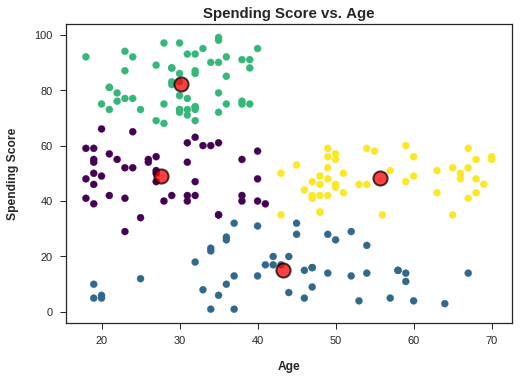

In [29]:
plt.scatter(df_kmeans_age['Age'], df_kmeans_age['Spending Score (1-100)'], s=50, c=y_kmeans_age, cmap='viridis')

centers_age = kmeans_age.cluster_centers_
print('Location of centroids: \n',centers_age,'\n\n')

i=0

while i < n_clusters_age:
  plt.scatter(centers_age[i,0],centers_age[i, 1], c='red', s = 200, alpha=0.75, edgecolor = 'black', linewidth =2, label=str(i))
  i+=1

plt.title('Spending Score vs. Age',fontsize=15,fontweight='bold')
plt.xlabel('Age',labelpad = 15,fontsize=12,fontweight='bold')
plt.ylabel('Spending Score',labelpad = 15,fontsize=12,fontweight='bold')

### Let's produce a scatter plot of age and income vs. spending score...

Text(0.5, 0, 'Spending Score (1-100)')

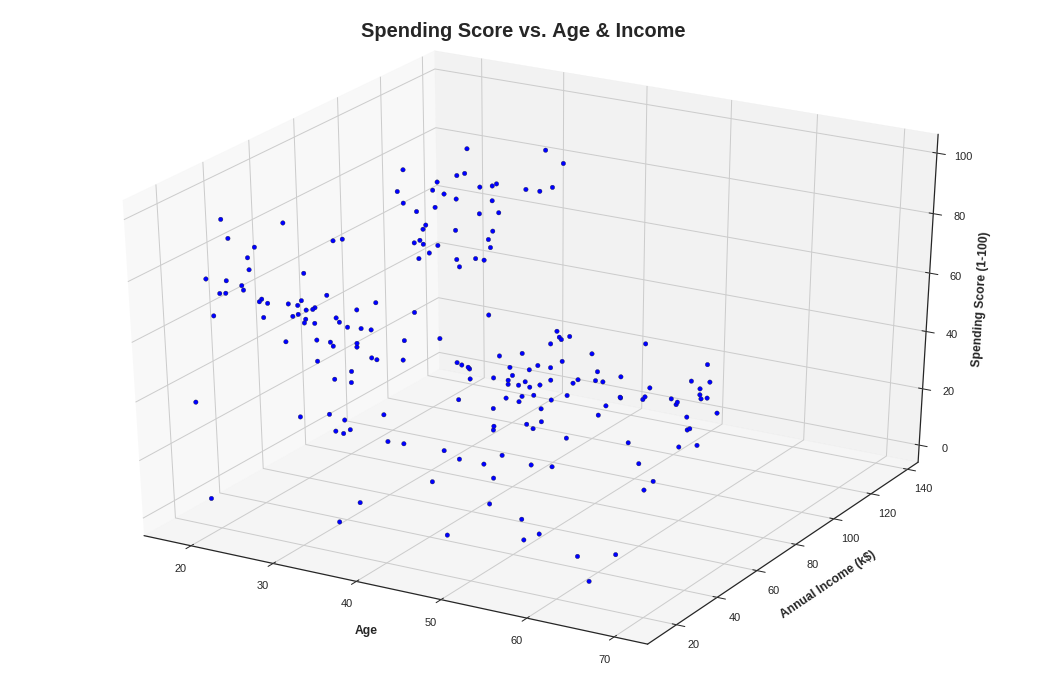

In [30]:
fig = plt.figure()
fig.set_size_inches(18.5, 12.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_kmeans_age_income['Age'],df_kmeans_age_income['Annual Income (k$)'], df_kmeans_age_income['Spending Score (1-100)'], c='blue', alpha = 1,cmap='viridis',edgecolor='k')

plt.title('Spending Score vs. Age & Income',fontsize=20,fontweight='bold',pad=25)
ax.set_xlabel('Age',fontweight='bold',labelpad=15)
ax.set_ylabel('Annual Income (k$)',fontweight='bold',labelpad=15)
ax.set_zlabel('Spending Score (1-100)',fontweight='bold',labelpad=10)

### Now, let's cluster this data using sklearns KMeans clustering algorithm.

In [0]:
n_clusters_age_income = 6
kmeans_age_income = KMeans(n_clusters=n_clusters_age_income)
kmeans_age_income.fit(df_kmeans_age_income)
y_kmeans_age_income = kmeans_age_income.predict(df_kmeans_age_income)

Location of centroids: 
 [[25.27272727 25.72727273 79.36363636]
 [27.         56.65789474 49.13157895]
 [41.68571429 88.22857143 17.28571429]
 [44.31818182 25.77272727 20.27272727]
 [32.69230769 86.53846154 82.12820513]
 [56.34090909 53.70454545 49.38636364]] 




Text(0.5, 0, 'Spending Score (1-100)')

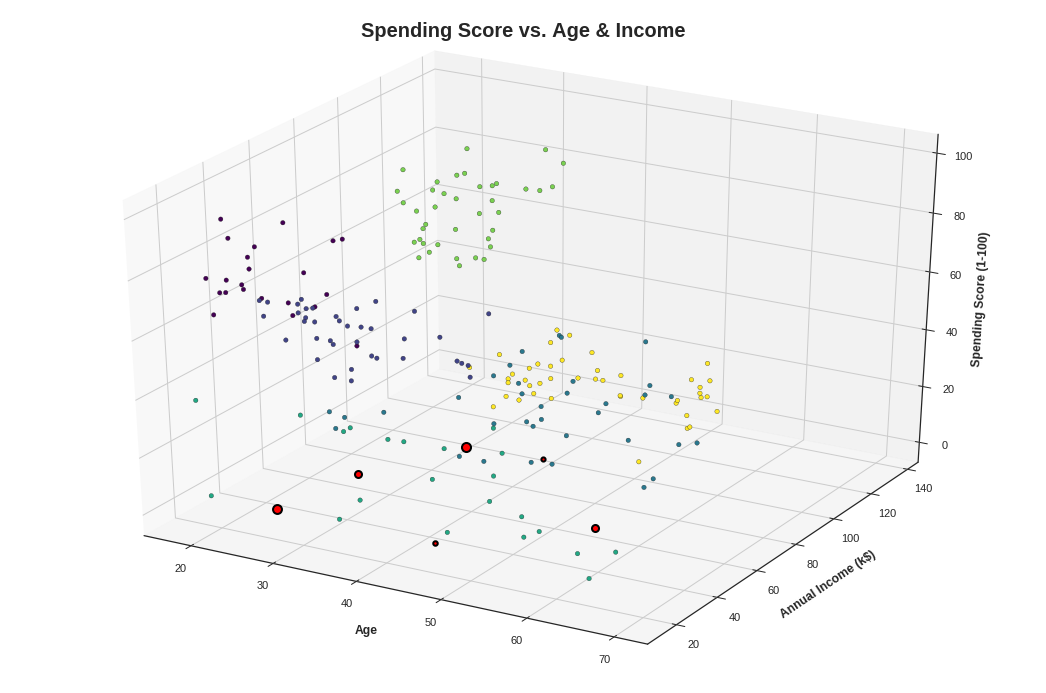

In [32]:
fig = plt.figure()
fig.set_size_inches(18.5, 12.5)
ax = fig.add_subplot(111, projection='3d')
centers_age_income = kmeans_age_income.cluster_centers_
centers_age = kmeans_age.cluster_centers_
print('Location of centroids: \n',centers_age_income,'\n\n')

i=0

while i < n_clusters_age_income:
  plt.scatter(centers_age_income[i,0],centers_age_income[i, 1], centers_age_income[i,2], c='red', alpha=1,edgecolor = 'black',linewidth =2, label='Centroid '+str(i))
  i+=1

ax.scatter(df_kmeans_age_income['Age'],df_kmeans_age_income['Annual Income (k$)'], df_kmeans_age_income['Spending Score (1-100)'], c=y_kmeans_age_income, alpha = 1,cmap='viridis',edgecolor='k')

plt.title('Spending Score vs. Age & Income',fontsize=20,fontweight='bold',pad=25)
ax.set_xlabel('Age',fontweight='bold',labelpad=15)
ax.set_ylabel('Annual Income (k$)',fontweight='bold',labelpad=15)
ax.set_zlabel('Spending Score (1-100)',fontweight='bold',labelpad=10)

### Let's change the column 'Gender' to a categorical variable and then code it.

In [33]:
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender Color,Age Groups,Income Groups,Spending Score Groups
CustomerID,,,,,,,,
1,1,19,15,39,#9b59b6,"(10, 20]","(10, 20]","(30, 40]"
2,1,21,15,81,#9b59b6,"(20, 30]","(10, 20]","(80, 90]"
3,0,20,16,6,#3498db,"(10, 20]","(10, 20]","(0, 10]"
4,0,23,16,77,#3498db,"(20, 30]","(10, 20]","(70, 80]"
5,0,31,17,40,#3498db,"(30, 40]","(10, 20]","(30, 40]"


### Let's get a histogram distribution of annual income.




Text(0.5, 1.0, 'Histogram - Annual Income')

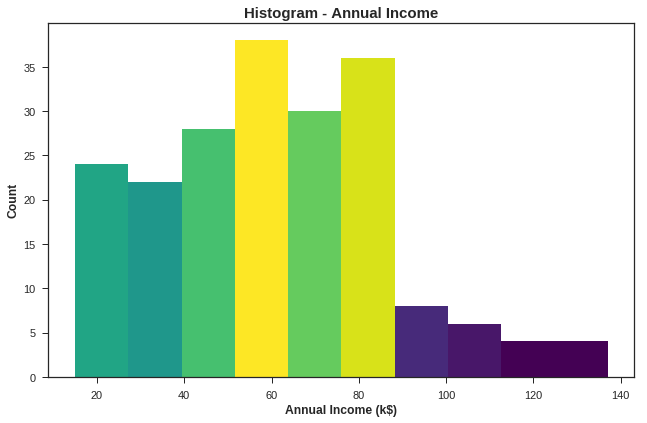

In [34]:
n_bins = 10
x = df['Annual Income (k$)']

fig, axs = plt.subplots()
fig.set_size_inches(10.5, 6.5)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs.hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
# sns.set_context("notebook", font_scale=1.1)
# sns.set_style("ticks")    
    
plt.xlabel('Annual Income (k$)',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Histogram - Annual Income',fontsize = 15,fontweight='bold')

### Let's plot a histogram of the age distribution.

Text(0.5, 1.0, 'Histogram - Age')

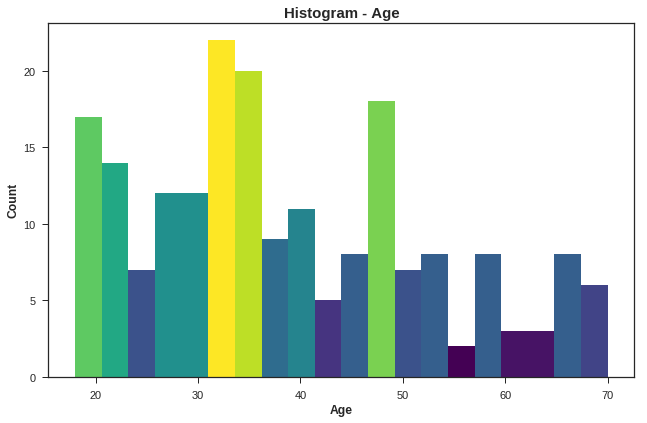

In [35]:
n_bins = 20
x = df['Age']

fig, axs = plt.subplots()
fig.set_size_inches(10.5, 6.5)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs.hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
# sns.set_context("notebook", font_scale=1.1)
# sns.set_style("ticks") 
    
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Histogram - Age',fontsize = 15,fontweight='bold')

### Let's plot a histogram of the spending score.

Text(0.5, 1.0, 'Histogram - Spending Score')

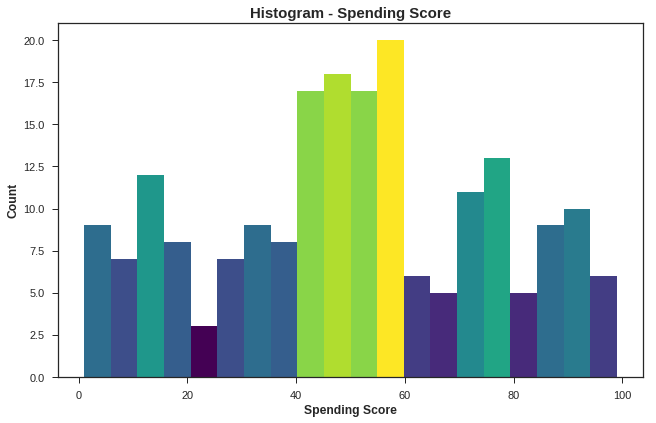

In [36]:
n_bins = 20
x = df['Spending Score (1-100)']

fig, axs = plt.subplots()
fig.set_size_inches(10.5, 6.5)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs.hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")    
    
plt.xlabel('Spending Score',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Histogram - Spending Score',fontsize = 15,fontweight='bold')

### Separate the dataset into train and test sets....

In [37]:
from sklearn.model_selection import train_test_split

y=df['Spending Score (1-100)']
X = df[['Gender','Age','Annual Income (k$)']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape, y_train.shape)

(134, 3) (134,)


### Use sklearn's StandardScaler to feature scale X_train and y.

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_mean = scaler.mean_
X_train_std_dev = scaler.scale_
print(X_train_mean,X_train_std_dev)

[ 0.47014925 38.88059701 60.76865672] [ 0.49910814 14.05057219 27.2188242 ]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
y_train = y_train.values.reshape(-1,1)

### Let's try to predict spending scores using the gender, age, and annual income attributes. First, we will train a LinearRegression model from sklearn...



In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
some_data = X_train_scaled[:5]
some_labels = y_train[:5]

print("Predictions: \n\n", lin_reg.predict(some_data))

Predictions: 

 [[45.32781356]
 [54.84817256]
 [36.2632878 ]
 [49.19881688]
 [53.10893906]]


In [42]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_train_scaled)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

25.361306744217398

In [43]:
X_test_scaled = (X_test-X_train_mean)/X_train_std_dev
y_pred_test = lin_reg.predict(X_test_scaled)
lin_mse = mean_squared_error(y_test, y_pred_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

22.403568295457987

### Wow, a RMSE of 25.4 on the train set and 22.4 on the test set is pretty high.  Well, we can tell from our earlier plots that there really isn't a linear relationship between Gender, Age, Annual Income and the Spending Score. We are probably underfitting the data and need to look at other ML algorithms.

### Let's see what we get if we don't feature scale X_train and X_test...

In [44]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

25.361306744217398

In [46]:
y_pred_test = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

22.403568295457987

### For the case of this dataset, feature-scaling provides no added benefit.

In [47]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor() 
tree_reg.fit(X_train,y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [48]:
y_pred = tree_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.3054236108907631

One way to evaluate the Decision Tree model would be to use the train_test_split function to split the training set into a smaller training set and a validation set, then train our models against the smaller training set and evaluate them against the validation set. It’s a bit of work, but nothing too difficult and it would work fairly well.

A great alternative is to use** Scikit-Learn’s cross-validation** feature. The following code performs K-fold cross-validation: it randomly splits the training set into 3 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,X_train,y_train,scoring="neg_mean_squared_error", cv=3)
tree_rmse_scores = np.sqrt(-scores)

In [50]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [31.789586   28.57300591 35.22782991]
Mean: 31.86347393738485
Standard deviation: 2.717322847291242


### Let’s compute the same scores for the Linear Regression model just to be sure:

In [51]:
lin_scores = cross_val_score(lin_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=3)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [28.28001533 25.65286389 24.33729387]
Mean: 26.090057696066566
Standard deviation: 1.6390275449372858


**We have verified that the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.**

Let's try one more model: the **RandomForestRegressor**. Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. **Building a model on top of many other models is called Ensemble Learning , and it is often a great way to push ML algorithms even further.**

In [52]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [53]:
y_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

10.177973791355155

In [56]:
y_pred_test = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred_test)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

19.255705569251337

### Well, our RMSE is decreasing but the RandomForest model is overfiiting the train set.

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [1,2,3]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [1,2, 3]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid,scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was 

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [1, 2, 3]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [1, 2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [62]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [63]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

26.376185298714184 {'max_features': 1, 'n_estimators': 3}
24.588310905133273 {'max_features': 1, 'n_estimators': 10}
24.389848909394797 {'max_features': 1, 'n_estimators': 30}
25.27502126278359 {'max_features': 2, 'n_estimators': 3}
23.79299664752887 {'max_features': 2, 'n_estimators': 10}
23.485931231676826 {'max_features': 2, 'n_estimators': 30}
26.057501156112977 {'max_features': 3, 'n_estimators': 3}
23.49278805040871 {'max_features': 3, 'n_estimators': 10}
23.559306972899307 {'max_features': 3, 'n_estimators': 30}
27.691014581578877 {'bootstrap': False, 'max_features': 1, 'n_estimators': 3}
27.382832826099083 {'bootstrap': False, 'max_features': 1, 'n_estimators': 10}
29.354028627826377 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
28.205002136542873 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
30.953741632658236 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
31.54644644935606 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


### Fine-tuning the model using Randomized Search

The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead.

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=3),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,n_iter=10, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was 

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbe64c5e898>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbe64d79c50>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [65]:
rnd_search.best_params_

{'max_features': 2, 'n_estimators': 152}

In [66]:
cvres_rnd = rnd_search.cv_results_
for mean_score, params in zip(cvres_rnd["mean_test_score"], cvres_rnd["params"]):
    print(np.sqrt(-mean_score), params)

24.53472645965839 {'max_features': 1, 'n_estimators': 180}
25.22703966968122 {'max_features': 1, 'n_estimators': 15}
24.50047723771991 {'max_features': 1, 'n_estimators': 72}
24.508330326589753 {'max_features': 1, 'n_estimators': 21}
24.492948311386993 {'max_features': 1, 'n_estimators': 122}
24.52688976717195 {'max_features': 1, 'n_estimators': 75}
24.582622331917914 {'max_features': 1, 'n_estimators': 88}
24.521589507397763 {'max_features': 1, 'n_estimators': 100}
23.805768788769928 {'max_features': 2, 'n_estimators': 152}
24.579763545845772 {'max_features': 1, 'n_estimators': 150}


For the randomized search, we obtain the best solution by setting the max_features hyperparameter to 2, and the n_estimators hyperparameter to 152. The RMSE score for this combination is 28.8, which is slightly better than the score we got earlier using the default hyperparameter values (which was 52,564).** Hooray, we have successfully fine-tuned our best model!**

We will often gain good insights on the problem by inspecting the best models. For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:

In [69]:
grid_feature_importances = grid_search.best_estimator_.feature_importances_
grid_feature_importances

array([0.02695109, 0.53078982, 0.44225909])

In [71]:
rnd_feature_importances = rnd_search.best_estimator_.feature_importances_
rnd_feature_importances

array([0.03613546, 0.52638558, 0.43747896])

In [70]:
X_train.head()

,Gender,Age,Annual Income (k$)
CustomerID,,,
43,1,48,39
190,0,36,103
91,0,68,59
137,0,44,73
52,1,33,42


### It looks like the 'Gender' variable is much less important to predicting the Spending Score than 'Age' or 'Annual Income'.

### Now it is time to evaluate the final model on the test set.

In [72]:
final_model_grid = grid_search.best_estimator_ 
final_predictions_grid = final_model_grid.predict(X_test) 
final_mse_grid = mean_squared_error(y_test, final_predictions_grid) 
final_rmse_grid = np.sqrt(final_mse_grid) 
print(final_rmse_grid)

19.55744831828074


In [73]:
final_model_rnd = rnd_search.best_estimator_ 
final_predictions_rnd = final_model_rnd.predict(X_test) 
final_mse_rnd = mean_squared_error(y_test, final_predictions_rnd) 
final_rmse_rnd = np.sqrt(final_mse_rnd) 
print(final_rmse_rnd) 

20.5525784430776


### Let's write a function to compute a 95% confidence interval for the test RMSE:

In [0]:
from scipy import stats

def ComputeConfidenceInterval(final_predictions):
  confidence = 0.95
  squared_errors = (final_predictions - y_test) ** 2
  mean = squared_errors.mean()
  m = len(squared_errors)
  return np.sqrt(stats.t.interval(confidence, m - 1,loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

In [76]:
conf_interval_grid = ComputeConfidenceInterval(final_predictions_grid)
print(conf_interval_grid)

[12.86669395 24.48337714]


In [77]:
conf_interval_rnd = ComputeConfidenceInterval(final_predictions_rnd)
print(conf_interval_rnd)

[13.62227064 25.67587786]


### Compute Confidence Interval Using T-Scores...

In [0]:
def ComputeConfidenceTScore(final_predictions):
  confidence = 0.95
  squared_errors = (final_predictions - y_test) ** 2
  mean = squared_errors.mean()
  m = len(squared_errors)
  tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
  tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
  return np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

In [79]:
conf_interval_t_grid = ComputeConfidenceTScore(final_predictions_grid)
print(conf_interval_t_grid)

(12.866693947313303, 24.48337714267817)


In [80]:
conf_interval_t_rnd = ComputeConfidenceTScore(final_predictions_rnd)
print(conf_interval_t_rnd)

(13.62227063934753, 25.67587786125503)


### Compute Confidence Interval Using z-scores...

In [0]:
def ComputeConfidenceZScore(final_predictions):
  confidence = 0.95
  squared_errors = (final_predictions - y_test) ** 2
  mean = squared_errors.mean()
  m = len(squared_errors)
  zscore = stats.norm.ppf((1 + confidence)/ 2)
  zmargin = zscore * squared_errors.std(ddof=1)/np.sqrt(m)
  return np.sqrt(mean - zmargin),np.sqrt(mean + zmargin)

In [82]:
conf_interval_z_grid = ComputeConfidenceZScore(final_predictions_grid)
print(conf_interval_z_grid)

(13.022668079006708, 24.40077223262543)


In [83]:
conf_interval_z_rnd = ComputeConfidenceZScore(final_predictions_rnd)
print(conf_interval_z_rnd)

(13.783132569536935, 25.589885069853015)
